2015 936
2016 993
2017 443


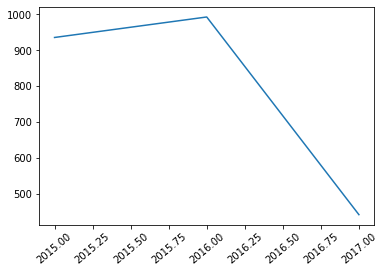

In [200]:
#Check the trend of investments over the years. To check the trend, find -
#Total number of fundings done in each year.
#Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
#Print year-wise total number of fundings also. Print years in ascending order.
#Note :
#There is some error in the 'Date' feature. Make sure to handle that.
#Output Format :
#year1 TotalFunding1
#year2 TotalFunding2
#.....
import matplotlib.pyplot as plt
import csv 
import numpy as np

file_obj = open('C:/Users/Chiranth SB/Downloads/startup_funding.csv',encoding="cp437", errors='ignore')
file_data = csv.DictReader(file_obj, skipinitialspace = True)

year = []
for i in file_data:
    y = int(i['Date'][-4:])
    year.append(y)

d = {}
for i in year:
    d[i] = d.get(i,0) + 1

sorted_d = sorted(d.items(), reverse=False)

y = []
c = []

for i in sorted_d:
    y.append(i[0])
    c.append(i[1])

plt.plot(y,c)
plt.xticks(rotation = 40)
plt.show

for i in range(len(c)):
    print(y[i],c[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


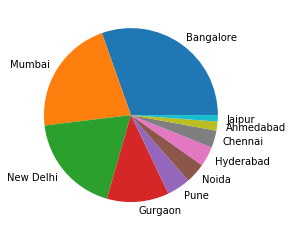

In [223]:
#Find out which cities are generally chosen for starting a startup.
#Find top 10 Indian cities which have most number of startups ?
#Plot a pie chart and visualise it.
#Print the city name and number of startups in that city also.
#Note :
#Take city name "Delhi" as "New Delhi".
#Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
#For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
#Print the city in descending order with respect to the number of startups.
#Output Format :
#city1 number1
#city2 number2
#. . . 
import matplotlib.pyplot as plt
import csv 
import pandas as pd

file_obj = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_obj.copy()
df['CityLocation'].dropna(inplace=True)
def seperatecity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(seperatecity)
df['CityLocation'] = df['CityLocation'].replace('Delhi', 'New Delhi')
df['CityLocation'] = df['CityLocation'].str.lower().str.title() #camelcase 
temp = df.CityLocation.value_counts()
city = []
strup = []
for i in range(10):
    city.append(temp.index[i])
    strup.append(temp.values[i])
    print(temp.index[i], temp.values[i])
plt.pie(strup, labels = city)
plt.show()

In [17]:
#Problem Statement :
#find out if cities play any role in receiving funding.
#Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
#Print the city and percentage with 2 decimal place after rounding off.
#Note:
#Take city name "Delhi" as "New Delhi".
#Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
#For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
#Print the city in descending order with respect to the percentage of funding.
#Output Format :
#city1 percent1
#city2 percent2
#city3 percent3
#. . . 
import csv 
import pandas as pd

file_obj = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_obj.copy()
df = df.dropna(subset=['CityLocation'])
def seperatecity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(seperatecity)
df['CityLocation'] = df['CityLocation'].replace('Delhi', 'New Delhi')
df['CityLocation'] = df['CityLocation'].str.lower().str.title() #camelcase 
df = df.dropna(subset=['AmountInUSD'])
df.reset_index(drop = True, inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
vab = df.groupby('CityLocation').AmountInUSD.sum()
top_10 = vab.nlargest(10) 
cities = ['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Chennai', 'Pune', 'Hyderabad', 'Noida', 'Ahmedabad', 'Jaipur']
amt = []
total = sum(top_10.values)
for i in top_10:
    amt.append(i)
for i in range(len(amt)):
    print(cities[i], format((amt[i]*100)/total,'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [29]:
#Better method
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_obj = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_obj.copy()
df = df.dropna(subset=['CityLocation'])
def seperatecity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(seperatecity)
df['CityLocation'] = df['CityLocation'].replace('Delhi', 'New Delhi')
df['CityLocation'] = df['CityLocation'].str.lower().str.title() #camelcase 
df['CityLocation'].dropna(inplace=True)
df['AmountInUSD'].dropna(inplace=True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))
city_num = df.groupby('CityLocation').AmountInUSD.sum().[:10]
city = city_num.index
fund = city_num.values
y = sum(fund)
for i in range(len(city)):
               print(city[i],format((fund[i]*100)/y,'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


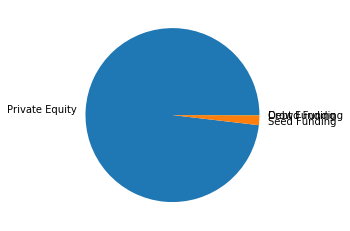

In [38]:
#There are 4 different type of investments. Find out percentage of amount funded for each investment type.
#Plot a pie chart to visualise.
#Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
#Note :
#Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
#Print the investment type in descending order with respect to the percentage of the amount funded.
#Output Format :
#investmentType1 percent1
#investmentType2 percent2
#investmentType3 percent3
#. . . 
import pandas as pd
import csv
import matplotlib.pyplot as plt

file_data = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_data.copy()
df['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace=True)
df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace=True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace=True)
df.dropna(subset=['AmountInUSD'], inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
total = df['AmountInUSD'].sum()
var = df.groupby('InvestmentType').AmountInUSD.sum().sort_values(ascending=False)[:10]
type = var.index
mon  = var.values
tot = sum(mon)
for i in range(len(mon)):
    print(type[i], format((mon[i]*100)/tot,'.2f'))
plt.pie(mon, labels=type)
plt.show()

In [62]:
#Problem Statement :
#Which type of companies got more easily funding. To answer this question, find -
#Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
#Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
#Note :
#Ecommerce is the right word in IndustryVertical, so correct it.
#Print the industry in descending order with respect to the percentage of the amount funded.
#Output Format :
#industry1 percent1
#industry2 percent2
#industry3 percent3
#. . . 
import pandas as pd
import csv

file_data = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_data.copy()
df['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace=True)
df['IndustryVertical'].replace('ECommerce', 'Ecommerce', inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)
df.dropna(subset=['IndustryVertical'], inplace=True)
df.dropna(subset=['AmountInUSD'], inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
#df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))

indus = df.groupby('IndustryVertical').AmountInUSD.sum().sort_values(ascending=False)[:5]
in_type = indus.index
fund = indus.values
y = sum(fund)
for i in range(len(fund)):
    print(in_type[i], format((fund[i]*100)/y,'.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [73]:
#Find top 5 startups with most amount of total funding.
#Print the startup name in descending order with respect to amount of funding.
#Note:
#Ola, Flipkart, Oyo, Paytm are important startups, so correct their names.
#There are many errors in startup names, ignore correcting all, just handle important ones.
#Output Format :
#startup1
#startup2
#startup3
#. . . 
import pandas as pd

file_data = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_data.copy()
df['StartupName'].replace('Olacabs', 'Ola', inplace=True)
df['StartupName'].replace('Ola Cabs', 'Ola', inplace=True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace=True) 
df['StartupName'].replace('OyoRooms', 'Oyo', inplace=True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace=True)
df.dropna(subset=['StartupName'], inplace=True)
df.dropna(subset=['AmountInUSD'], inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
#df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))

indus = df.groupby('StartupName').AmountInUSD.sum().sort_values(ascending=False)[:5]
in_type = indus.index
for i in range(len(in_type)):
    print(in_type[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [173]:
#Problem Statement :
#Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
#Print the startup name in descending order with respect to the number of funding round as integer value.
#Note:
#Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
#Output Format :
#startup1 number1
#startup2 number2
#startup3 number3
#. . . 
import pandas as pd

file_data = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_data.copy()
df['StartupName'].replace('Olacabs', 'Ola', inplace=True)
df['StartupName'].replace('Ola Cabs', 'Ola', inplace=True)
df['StartupName'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['StartupName'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Oyorooms', 'Oyo', inplace=True) 
df['StartupName'].replace('OyoRooms', 'Oyo', inplace=True)
df['StartupName'].replace('OYO Rooms', 'Oyo', inplace=True)
df['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace=True)
ind = df.StartupName.value_counts()[:5]
for i in range(len(ind)):
    print(ind.index[i], ind.values[i])

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


In [9]:
#Problem Statement :
#Find the Investors who have invested maximum number of times.
#Print the investor name and number of times invested as integer value.
#Note:
#In startup, multiple investors might have invested. So consider each investor for that startup.
#Ignore the undisclosed investors.
#Output Format :
#investorname number


import pandas as pd
import operator

file_data = pd.read_csv('C:\\Users\\Chiranth SB\\Downloads\\startup_funding.csv')
df = file_data.copy()
df = df[df.InvestorsName != 'Undisclosed']
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df.InvestorsName.dropna(inplace=True)
l = []
for i in df.InvestorsName:
    l.append(i.split(','))
lis = []
for i in l:
    for j in i:
        lis.append(j.strip())
d = {}
for i in lis:
    d[i] = d.get(i,0) + 1

sorted_d = sorted(d.items(), key=operator.itemgetter(1),reverse=True)
j = 1
for i in sorted_d:
        print(i[0], i[1])
        if j == 1:
            break
        j += 1
#m = max(list(d.values()))
#for i in d:
#    if d[i] == m:
#        print(i, d[i])

Sequoia Capital 64


In [58]:
#Better method
import pandas as pd
import matplotlib.pyplot as plt
import operator

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=['InvestorsName'],inplace=True)
d={}
for i in df.index:
    inves = df.InvestorsName[i].split(',')
    for j in inves:
        d[j.strip()] = d.get(j.strip(),0) + 1
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)[:1]
for i in sorted_d:
    print(i[0], i[1])

Sequoia Capital 64
